In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('CoVIDStatewiseCount.csv')
df

,Date,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured/Discharged/Migrated,Death
0,26-03-2020,Andhra Pradesh,11,0,1,0
1,26-03-2020,Bihar,3,0,0,1
2,26-03-2020,Chhattisgarh,3,0,0,0
3,26-03-2020,Delhi,34,1,6,1
4,26-03-2020,Goa,3,0,0,0
5,26-03-2020,Gujarat,37,1,0,2
6,26-03-2020,Haryana,16,14,11,0
7,26-03-2020,Himachal Pradesh,3,0,0,1
8,26-03-2020,Karnataka,41,0,3,1
9,26-03-2020,Kerala,110,8,4,0


In [3]:
df_total = df.loc[df["Name of State / UT"]=="Total number of confirmed cases in India",:]
active_list = ['Total Confirmed cases (Indian National)', 'Total Confirmed cases ( Foreign National )']
df_total["Active"] = df_total[active_list].sum(axis=1)
df_total

C:\Users\DELL\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Date,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured/Discharged/Migrated,Death,Active
26,26-03-2020,Total number of confirmed cases in India,602,47,43,13,649
54,2020-03-26,Total number of confirmed cases in India,647,47,45,15,694


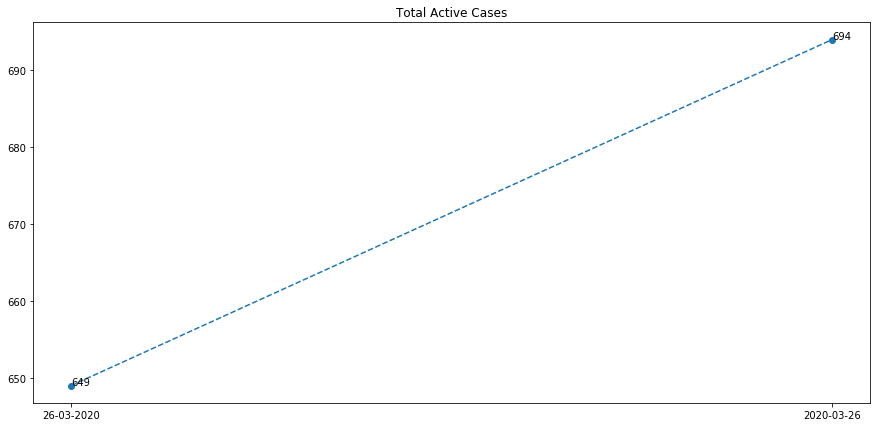

In [4]:
fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot(111)
ax.set_title('Total Active Cases')
ax.plot(df_total['Date'], df_total['Active'], marker='o', linestyle='--')

for i,j in zip(df_total['Date'], df_total['Active']):
    plt.text(i,j, str(j))

plt.show()

# fig, ax = plt.subplots(figsize=(15,5))
# sns.plot(x=df_total["Date"], y=df_total['Active'])

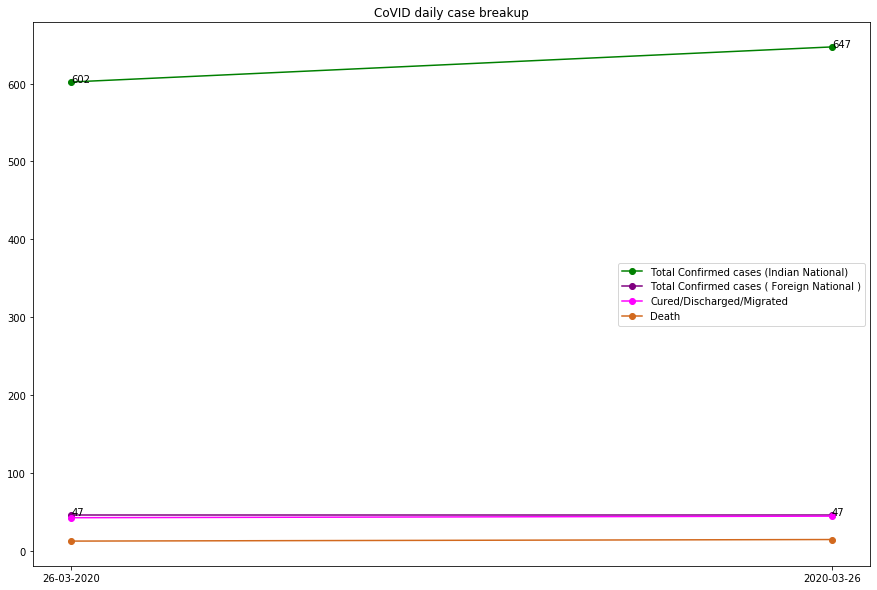

In [5]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
ax.set_title('CoVID daily case breakup')
ax.plot(df_total['Date'], df_total['Total Confirmed cases (Indian National)'], color='green', marker='o')
for i,j in zip(df_total['Date'], df_total['Total Confirmed cases (Indian National)']):
    plt.text(i,j, str(j))
    
ax.plot(df_total['Date'], df_total['Total Confirmed cases ( Foreign National )'], color='purple', marker='o')
for i,j in zip(df_total['Date'], df_total['Total Confirmed cases ( Foreign National )']):
    plt.text(i,j, str(j))
    
ax.plot(df_total['Date'], df_total['Cured/Discharged/Migrated'], color='magenta', marker='o')
ax.plot(df_total['Date'], df_total['Death'],  color='chocolate', marker='o')

plt.legend(['Total Confirmed cases (Indian National)', 
           'Total Confirmed cases ( Foreign National )', 
           'Cured/Discharged/Migrated', 
           'Death'])